# Linear regression with statsmodels

Demonstrate linear regression with statsmodels.

In [1]:
from typing import Tuple

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
import pandas as pd

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
def main():
    series_x, series_y, df = random_data_norm()
    x = sm.add_constant(df['x'])
    y = df['y']
    model = sm.OLS(
        endog=y,
        exog=x,
        missing='drop'
    )
    results = model.fit()
    predicted = results.predict(x)
    results.summary()
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.plot(
        series_x,
        series_y,
        marker='.',
        linestyle='None',
        color='#0077bb'
    )
    ax.plot(
        series_x,
        predicted,
        marker='None',
        linestyle='-',
        color='#cc3311'
    )
    ax.set_title(
        label='Regression analysis',
        fontsize=15,
        fontweight='bold'
    )
    ax.set_xlabel(
        xlabel='X axis label',
        fontsize=12,
        fontweight='bold'
    )
    ax.set_ylabel(
        ylabel='Y axis label',
        fontsize=12,
        fontweight='bold'
    )
    fig.savefig(
        fname='y_vs_x.svg',
        format='svg'
    )

In [5]:
def random_data_norm() -> Tuple[pd.Series, pd.Series, pd.DataFrame]:
    """
    Generate random normal data for x, y.

    Returns
    -------
    Tuple[pd.Series, pd.Series, pd.DataFrame]
        A pandas Series, a pandas Series, a pandas DataFrame
    """
    series_y = pd.Series(norm.rvs(size=42))
    series_x = pd.Series(norm.rvs(size=42))
    df = pd.DataFrame(
        {
            'x': series_x,
            'y': series_y
        }
    )
    return (series_x, series_y, df)

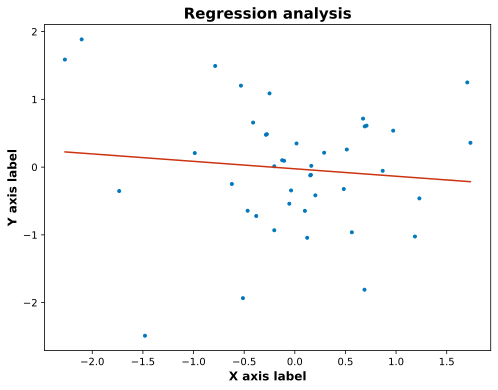

In [6]:
if __name__ == '__main__':
    main()